<a href="https://www.kaggle.com/code/kingki19/stock-market-analysis-google?scriptVersionId=178440123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Practice makes perfect* 

<center> <h1> Stock Market Analysis: Google </h1> </center>

# Initiation

## Libraries and Dataset
Dataset from: [https://www.kaggle.com/datasets/hchsmost/test-dataset/data](https://www.kaggle.com/datasets/hchsmost/test-dataset/data)

In [47]:
# IMPORT IMPORTANT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# INITIATE DATASET
df = pd.read_csv("/kaggle/input/test-dataset/GOOGL.csv")
display(df.head(5))
print(f"Shape of dataframe: {df.shape}")
print(df.info())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


Shape of dataframe: (4953, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4953 entries, 0 to 4952
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4953 non-null   object 
 1   Open       4953 non-null   float64
 2   High       4953 non-null   float64
 3   Low        4953 non-null   float64
 4   Close      4953 non-null   float64
 5   Adj Close  4953 non-null   float64
 6   Volume     4953 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 271.0+ KB
None


What is happen:
> We miss some days in that dataset. For an example, check dataframe above. We miss 2 days from `2004-08-20` to `2004-08-23`. We gonna try to fill this gap.

> We get dataframe that have `4953` rows and `7` columns.

> The `Date` columns is not in `datetime` type yet. 

## Preprocessing the data before analysis
1. Change `Date` columns to `datetime` type and set it as index in dataframe
2. fill missing date using `interpolation` method

In [48]:
def fill_missing_date(df):
    # Create a copy so it doesn't changes the original dataframe
    df_copy = df.copy()
    
    # Create full date range from start to last date
    full_dates = pd.date_range(start=df_copy.index.min(), end=df_copy.index.max(), freq='D')
    
    # Using reindex to make sure all date was exist
    df_reindexed = df.reindex(full_dates)
    
    # Fill the gap with interpolation linear method
    df_interpolated = df_reindexed.interpolate(method='linear')
    
    return df_interpolated

In [49]:
# Create a copy so it doesn't change the original dataframe
df_copy = df.copy()
# Change type in 'Date' columsn to datetime
df_copy['Date'] = pd.to_datetime(df_copy['Date'])
# Set index from 'Date' columns
df_copy = df_copy.set_index('Date')
# Apply the function
df_filled = fill_missing_date(df_copy)
display(df_filled.head(5))
print(f"Shape of dataframe: {df_filled.shape}")
print(df_filled.info())

,Open,High,Low,Close,Adj Close,Volume
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924.0
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856.0
2004-08-21,2.609026,2.766433,2.586336,2.719553,2.719553,426165408.0
2004-08-22,2.690274,2.803137,2.657658,2.728645,2.728645,395643960.0
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512.0


Shape of dataframe: (7188, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7188 entries, 2004-08-19 to 2024-04-23
Freq: D
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7188 non-null   float64
 1   High       7188 non-null   float64
 2   Low        7188 non-null   float64
 3   Close      7188 non-null   float64
 4   Adj Close  7188 non-null   float64
 5   Volume     7188 non-null   float64
dtypes: float64(6)
memory usage: 393.1 KB
None


What is happen:
> We have set `Date` columns into `datetime` type and make it as index.

> We have fill the missing dates. From `4953` rows to `7188` rows.

# What are those columns?
I never touch stock market (i am noob and poor btw 🥺) and don't understand what are those columns mean. I have asked LLM (chatGPT) to give me insight and here's his explanation:

1. **Open**: This is the price at which a stock or asset opens for trading during a specific period, typically at the beginning of a trading session or day.

2. **High**: This represents the highest price at which a stock or asset traded during the given period, such as a day, week, month, etc.

3. **Low**: The low price is the opposite of the high price. It indicates the lowest price at which a stock or asset traded during the specified period.

4. **Close**: This is the final price at which a stock or asset traded during the period, typically at the end of a trading session or day.

5. **Adj Close** (Adjusted Close): The adjusted close price reflects any corporate actions or events that impact the stock's price, such as dividends, stock splits, or mergers. It is adjusted to account for these factors, providing a more accurate representation of the stock's performance over time.

6. **Volume**: Volume refers to the total number of shares or contracts traded during a specific period. It indicates the level of market activity or liquidity for a particular stock or asset.

# Correlation

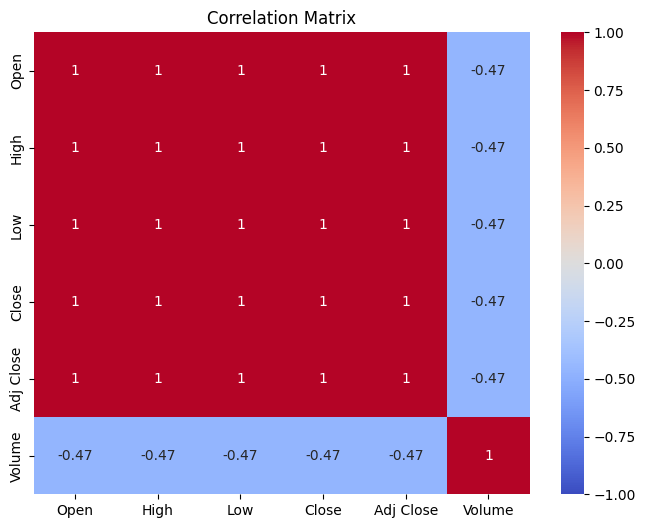

In [50]:
# Calculate correlation for each columns
correlation_matrix = df_filled.corr()

# Plotting correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

What does it mean?
> All columns have very strong positive correlation, except for `Volume` column.

> `Volume` column has weak negative correlation. That means if other goes up, it goes down.

# Plot

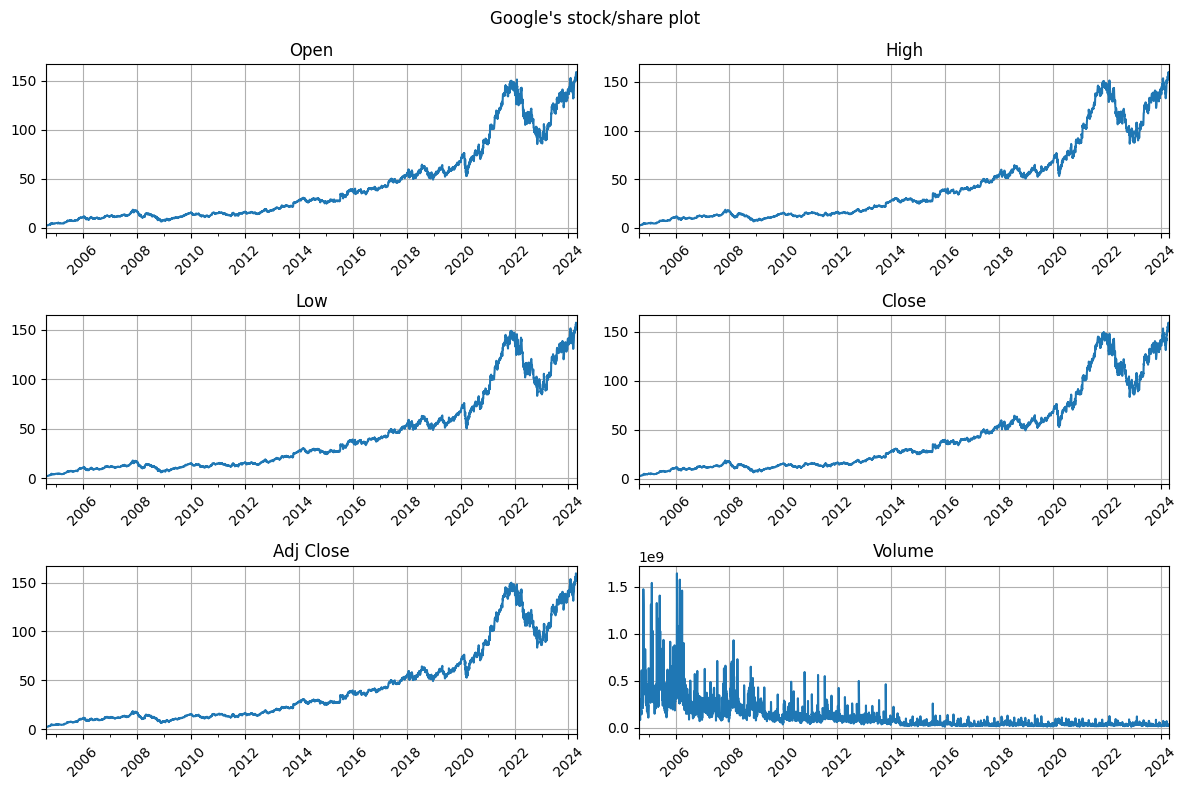

In [51]:
# Create a subplot for each column in the DataFrame
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))  # 2 baris, 3 kolom

for i, column in enumerate(df_filled.columns):  # Start from the second column
    row = i // 2  # Division without remainder for rows
    col = i % 2  # Remaining division for columns
    df_filled[column].plot(ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True)
    
fig.suptitle("Google's stock/share plot")
plt.tight_layout()
plt.show()

My opinion (analysis):
- Less people wanna buy or sell their Google's stock in the last 8 year (from 2014) when the stock price (seems) reach 40 USD. Because in `Volume` plot show less transaction volume after 2014 compared to before 2014.
- Something is happening that make Google stock price:
    - Rising up from 2020 to 2022. 
    - Falling down from 2022 to 2023. 
    - And rising up again from 2023 to 2024.
    
  But i don't know what is happening in those years. I never follow stock market news. 🤕  
  I think it's not correlated to their stock transaction volume and need further research to create stock sentiment analysis.

# Further Research
I don't have time to research all possibilities to do analysis on Google Stock Price dataset, because no one paid me 😭 and i still has main task to finish project in my collages. If i **remember**, i will add more analysis on this notebook. :)  
You also can help me too with copy this notebook and do your own analysis (or help me finish it).

- [ ] **Using start date from year 2014**: because there's no high volume stock transaction after 2014 (compare to before 2014).
- [ ] **Lag features analysis**: does it current time it's correlated to past time.
- [ ] **Regression Analysis & Prediction**: Try a simple Linear Regression for time-series analysis.
- [ ] **Volatility Analysis**: Use measures like standard deviation or Bollinger Bands to analyze the volatility of the stock prices.
- [ ] **Technical Analysis**: create a strategies using Moving Average and Relative Strength Index (RSI)
- [ ] **Seasonal Decompositon Analysis**: using `seasonal decompose` from sklearn and doing analysis from trend, seasonal, and residu from those data.
- [ ] **Create advance time-series modern model**: Using spesific modern model (neural network) like LTSM, CNN, FNN, and so on to create horizon prediction of stock price.
- [ ] **Add more sentiment data and doing sentiment stock analysis**: To add more feature in modelling. I won't do this. 😓